# Walmart Weekly Sale Prediction System

## Problem Statement
Walmart Inc. is the world’s largest company by revenue as well as the largest private employer and grocery retailer. 
Our aim is to accurately forecast department-wise weekly sales of Walmart based on various parameters like Store Type, Store Size, ongoing Discounts, etc as it helps its ability to function and provide employment. 


In [1]:
import pandas as pd 
import numpy as np
import math
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data Collection

Collected data from Kaggle.com that contains various files in CSV format.
We then merge these files to structure all features required for training.

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
stores_data = pd.read_csv('stores.csv')
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
feature_data = pd.read_csv('features.csv')
feature_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
train_data = pd.merge(train_data,stores_data,on='Store')
train_data = pd.merge(train_data,feature_data,on='Store')


In [6]:
train_data.head()

,Store,Dept,Date_x,Weekly_Sales,IsHoliday_x,Type,Size,Date_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.5,False,A,151315,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-05,24924.5,False,A,151315,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-05,24924.5,False,A,151315,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-05,24924.5,False,A,151315,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-02-05,24924.5,False,A,151315,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
train_data.tail()

,Store,Dept,Date_x,Weekly_Sales,IsHoliday_x,Type,Size,Date_y,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
76725735,45,98,2012-10-26,1076.8,False,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
76725736,45,98,2012-10-26,1076.8,False,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
76725737,45,98,2012-10-26,1076.8,False,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
76725738,45,98,2012-10-26,1076.8,False,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
76725739,45,98,2012-10-26,1076.8,False,B,118221,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [8]:
trainSet = pd.read_csv('train1.csv')
trainSet.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,8/26/2011,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,3/25/2011,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,12/3/2010,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,9/17/2010,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,5/18/2012,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


## Data Preprocessing

Fix the issue of missing data.
1.) We identify all features that have null values.
2.) Our analysis shows that only Markdown column, i.e. Discount parameter has null value, so we fix it by replacing null values to 0, since no discount implies 0% discount value.

In [9]:
#determining missing data
trainSet.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       181931
MarkDown2       208219
MarkDown3       190930
MarkDown4       192420
MarkDown5       181422
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [10]:
#Replacing missing markdown values as 0 as it implies no discount
from statistics import mean
trainSet['MarkDown1'] = trainSet['MarkDown1'].fillna(0)
trainSet['MarkDown2'] = trainSet['MarkDown2'].fillna(0)
trainSet['MarkDown3'] = trainSet['MarkDown3'].fillna(0)
trainSet['MarkDown4'] = trainSet['MarkDown4'].fillna(0)
trainSet['MarkDown5'] = trainSet['MarkDown5'].fillna(0)
trainSet.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,8/26/2011,87235.57,False,61.10,3.796,0.00,0.0,0.0,0.00,0.00,136.213613,7.767,A,152513
1,34,22,3/25/2011,5945.97,False,53.11,3.480,0.00,0.0,0.0,0.00,0.00,128.616064,10.398,A,158114
2,21,28,12/3/2010,1219.89,False,50.43,2.708,0.00,0.0,0.0,0.00,0.00,211.265543,8.163,B,140167
3,8,9,9/17/2010,11972.71,False,75.32,2.582,0.00,0.0,0.0,0.00,0.00,214.878556,6.315,A,155078
4,19,55,5/18/2012,8271.82,False,58.81,4.029,12613.98,0.0,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [11]:
#Group by store type and identify number of stores belonging to each type
type_grouped_store = trainSet.groupby('Type')['Store'].nunique()

## Data Exploration

Explore various types of Stores (three in this case) & number of stores falling under that Type.
Compare all features to identify how each feature impact Weekly sale.
Fetch records that have weekly sale greater than 180000.
Our analysis defines that the sales is highest during some specific weeks, and those are weeks around BlackFriday, Christmas, LabourDay, SuperBowl.
We change our holiday column value if the period was a holiday period as per the date.

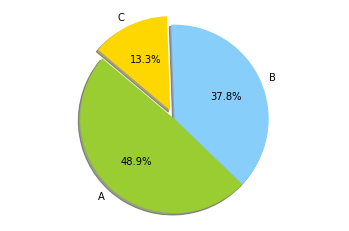

In [12]:
#plot pie chart of percentage of stores of each type
labels = 'A', 'B', 'C'
sizes = [(type_grouped_store[0]/45)*100, (type_grouped_store[1]/45)*100, (type_grouped_store[2]/45)*100]
colors = ['yellowgreen', 'lightskyblue', 'gold']
explode = (0, 0, 0.1) # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

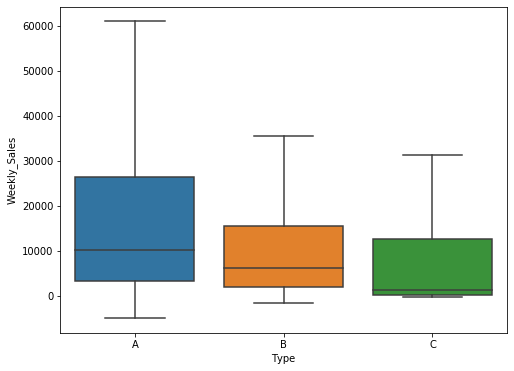

In [13]:
store_sale = pd.concat([trainSet['Type'], trainSet['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

[]

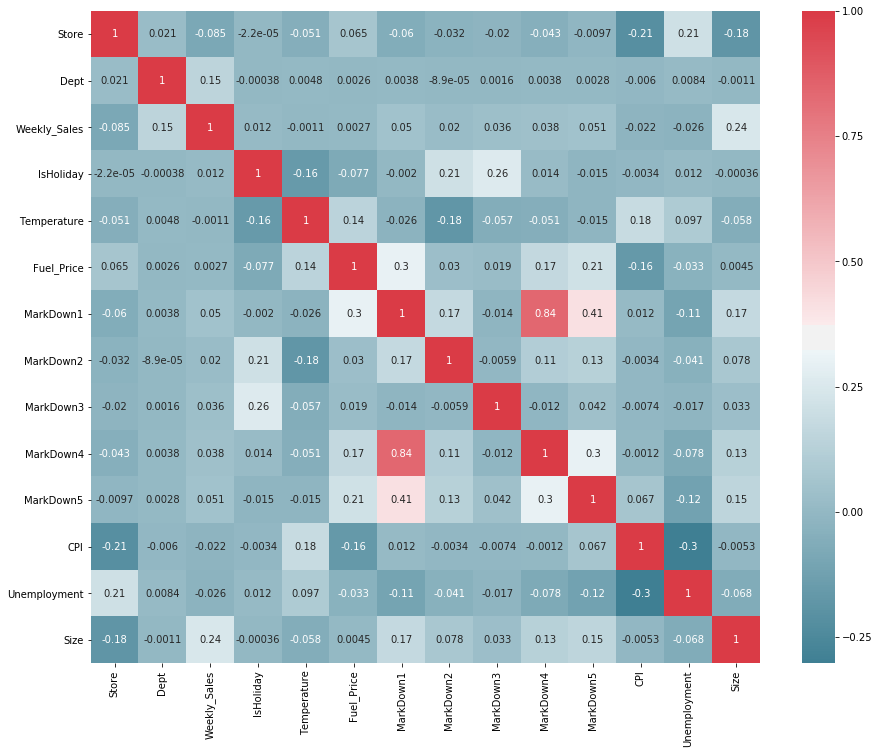

In [14]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(15,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(trainSet.corr(),annot=True,cmap=cmap)
plt.plot()

In [15]:
#Determine top 5 dates with highest sale
trainSet.loc[trainSet['Weekly_Sales'] >180000,"Date"].value_counts().head()

11/25/2011    28
12/24/2010    25
11/26/2010    23
12/23/2011    17
12/17/2010     8
Name: Date, dtype: int64

### Highest sales is identified around Christmas and Black Friday

In [16]:
trainSet1 = trainSet.copy()
# Extract date features
trainSet1['Date'] = pd.to_datetime(trainSet1['Date'])
trainSet1['Date_dayofweek'] = trainSet1['Date'].dt.dayofweek
trainSet1['Date_month'] = trainSet1['Date'].dt.month 
trainSet1['Date_year'] = trainSet1['Date'].dt.year
trainSet1['Date_day'] = trainSet1['Date'].dt.day
trainSet1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Date_dayofweek,Date_month,Date_year,Date_day
0,26,92,2011-08-26,87235.57,False,61.10,3.796,0.00,0.0,0.0,0.00,0.00,136.213613,7.767,A,152513,4,8,2011,26
1,34,22,2011-03-25,5945.97,False,53.11,3.480,0.00,0.0,0.0,0.00,0.00,128.616064,10.398,A,158114,4,3,2011,25
2,21,28,2010-12-03,1219.89,False,50.43,2.708,0.00,0.0,0.0,0.00,0.00,211.265543,8.163,B,140167,4,12,2010,3
3,8,9,2010-09-17,11972.71,False,75.32,2.582,0.00,0.0,0.0,0.00,0.00,214.878556,6.315,A,155078,4,9,2010,17
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,0.0,11.5,1705.28,3600.79,138.106581,8.150,A,203819,4,5,2012,18


In [18]:
trainSet1['Super_Bowl'] = np.where((trainSet1['Date']==datetime(2010, 2, 12)) | (trainSet1['Date']==datetime(2011, 2, 11)) | (trainSet1['Date']==datetime(2012, 2, 10)) | (trainSet1['Date']==datetime(2013, 2, 8)),1,0)
trainSet1['Labour_Day'] = np.where((trainSet1['Date']==datetime(2010, 9, 10)) | (trainSet1['Date']==datetime(2011, 9, 9)) | (trainSet1['Date']==datetime(2012, 9, 7)) | (trainSet1['Date']==datetime(2013, 9, 6)),1,0)
trainSet1['BlackFriday'] = np.where((trainSet1['Date']==datetime(2010, 11, 26)) | (trainSet1['Date']==datetime(2011, 11, 25)) | (trainSet1['Date']==datetime(2012, 11, 23)) | (trainSet1['Date']==datetime(2013, 11, 29)),1,0)
trainSet1['Christmas'] = np.where((trainSet1['Date']==datetime(2010, 12, 31)) | (trainSet1['Date']==datetime(2011, 12, 30)) | (trainSet1['Date']==datetime(2012, 12, 28)) | (trainSet1['Date']==datetime(2013, 12, 27)),1,0)
trainSet1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Date_dayofweek,Date_month,Date_year,Date_day,Super_Bowl,Labour_Day,BlackFriday,Christmas
0,26,92,2011-08-26,87235.57,False,61.10,3.796,0.00,0.0,0.0,...,A,152513,4,8,2011,26,0,0,0,0
1,34,22,2011-03-25,5945.97,False,53.11,3.480,0.00,0.0,0.0,...,A,158114,4,3,2011,25,0,0,0,0
2,21,28,2010-12-03,1219.89,False,50.43,2.708,0.00,0.0,0.0,...,B,140167,4,12,2010,3,0,0,0,0
3,8,9,2010-09-17,11972.71,False,75.32,2.582,0.00,0.0,0.0,...,A,155078,4,9,2010,17,0,0,0,0
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,0.0,11.5,...,A,203819,4,5,2012,18,0,0,0,0


In [19]:
#converting categorical Holiday values to numerical values(False=0, True=1)
mapping = {False: 0, True: 1}
trainSet1['IsHoliday'] = trainSet1['IsHoliday'].map(mapping)

In [20]:
# Altering the isHoliday value depending on these new holidays...
trainSet1['IsHoliday']=trainSet1['IsHoliday']|trainSet1['Super_Bowl']|trainSet1['Labour_Day']|trainSet1['BlackFriday']|trainSet1['Christmas']
trainSet1.head(15)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Date_dayofweek,Date_month,Date_year,Date_day,Super_Bowl,Labour_Day,BlackFriday,Christmas
0,26,92,2011-08-26,87235.57,0,61.10,3.796,0.00,0.00,0.00,...,A,152513,4,8,2011,26,0,0,0,0
1,34,22,2011-03-25,5945.97,0,53.11,3.480,0.00,0.00,0.00,...,A,158114,4,3,2011,25,0,0,0,0
2,21,28,2010-12-03,1219.89,0,50.43,2.708,0.00,0.00,0.00,...,B,140167,4,12,2010,3,0,0,0,0
3,8,9,2010-09-17,11972.71,0,75.32,2.582,0.00,0.00,0.00,...,A,155078,4,9,2010,17,0,0,0,0
4,19,55,2012-05-18,8271.82,0,58.81,4.029,12613.98,0.00,11.50,...,A,203819,4,5,2012,18,0,0,0,0
5,13,91,2012-03-16,87954.06,0,52.50,3.529,8901.34,637.70,3.85,...,A,219622,4,3,2012,16,0,0,0,0
6,19,14,2010-08-06,18882.41,0,74.20,2.942,0.00,0.00,0.00,...,A,203819,4,8,2010,6,0,0,0,0
7,2,82,2010-12-24,105272.74,0,49.97,2.886,0.00,0.00,0.00,...,A,202307,4,12,2010,24,0,0,0,0
8,32,26,2010-10-08,6526.96,0,61.81,2.745,0.00,0.00,0.00,...,A,203007,4,10,2010,8,0,0,0,0
9,45,72,2012-03-02,41820.87,0,41.55,3.816,22832.38,2515.25,4.00,...,B,118221,4,3,2012,2,0,0,0,0


In [21]:
# Droping the redundant holiday variables
holiday_val=['Super_Bowl','Labour_Day','BlackFriday','Christmas']
trainSet1.drop(holiday_val,axis=1,inplace=True)
trainSet1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Date_dayofweek,Date_month,Date_year,Date_day
0,26,92,2011-08-26,87235.57,0,61.10,3.796,0.00,0.0,0.0,0.00,0.00,136.213613,7.767,A,152513,4,8,2011,26
1,34,22,2011-03-25,5945.97,0,53.11,3.480,0.00,0.0,0.0,0.00,0.00,128.616064,10.398,A,158114,4,3,2011,25
2,21,28,2010-12-03,1219.89,0,50.43,2.708,0.00,0.0,0.0,0.00,0.00,211.265543,8.163,B,140167,4,12,2010,3
3,8,9,2010-09-17,11972.71,0,75.32,2.582,0.00,0.0,0.0,0.00,0.00,214.878556,6.315,A,155078,4,9,2010,17
4,19,55,2012-05-18,8271.82,0,58.81,4.029,12613.98,0.0,11.5,1705.28,3600.79,138.106581,8.150,A,203819,4,5,2012,18


## Problem Solution

We convert only Categorical feature, i.e. IsHoliday to numerical feature (False=0, True=1).
Total train dataset is huge, i.e. more than 75 million records.
We split our dataset into train & test data into 80-20 ratio and try various models on our data to achieve highest Accuracy.
We start with Linear regression that yields 8.3% accuracy to Gradient Boosting Regressor that yields 96.5% accuracy.

### Prediction Model

In [22]:
X = trainSet1.drop(['Weekly_Sales','Date','Type'], axis=1)
Y = trainSet1['Weekly_Sales']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Date_dayofweek,Date_month,Date_year,Date_day
3708,15,41,0,27.54,2.909,0.00,0.00,0.0,0.00,0.00,131.637000,8.350,123737,4,2,2010,19
77278,28,32,0,50.23,2.825,0.00,0.00,0.0,0.00,0.00,126.552286,13.975,206302,4,2,2010,26
79278,14,32,0,81.46,2.771,0.00,0.00,0.0,0.00,0.00,182.350989,8.743,200898,4,7,2010,23
27700,16,31,0,52.08,2.737,0.00,0.00,0.0,0.00,0.00,189.445243,6.842,57197,4,5,2010,28
159606,18,92,0,47.88,3.571,5223.35,1781.71,182.6,1170.74,4346.68,136.466667,8.471,120653,4,11,2011,18


In [28]:
from sklearn import metrics

#### Linear Regression

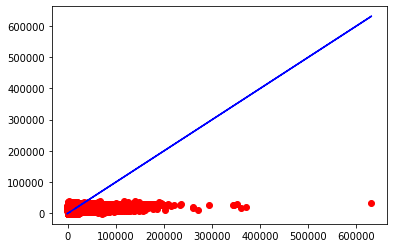

In [24]:
## Methood 1: Linear Regression
from sklearn.linear_model import LinearRegression
clf_linear = LinearRegression()
clf_linear.fit(X_train, y_train)
y_pred_linear=clf_linear.predict(X_test)

plt.plot(y_test, y_pred_linear,'ro')
plt.plot(y_test, y_test,'b-')
plt.show()

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))
accuracy_linear=clf_linear.score(X_test,y_test)
print('Linear Regressor Accuracy:',(accuracy_linear*100),'%')

Mean Absolute Error: 14551.743745969965
Mean Squared Error: 471422958.2670247
Root Mean Squared Error: 21712.276671667223
Linear Regressor Accuracy: 8.308150583732743 %


#### KNN Regressor

Mean Absolute Error: 11537.417599458322
Mean Squared Error: 352671214.81586546
Root Mean Squared Error: 18779.54245491262
KNN Regressor Accuracy: 31.405385853032808 %


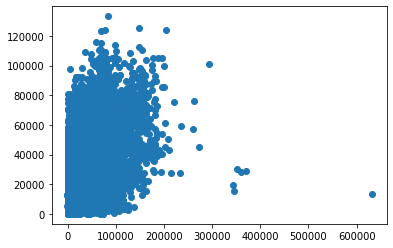

In [30]:
#Method 2: KNN with 10-neighbors

from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

plt.scatter(y_test,y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy_knn=knn.score(X_test,y_test)
print('KNN Regressor Accuracy:',(accuracy_knn*100),'%')

#### Decision Tree Regressor

In [31]:
#method 3: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy_dt=dt.score(X_test,y_test)
print('Decision Tree Regressor Accuracy:',(accuracy_dt*100),'%')


Mean Absolute Error: 2004.6368664034976
Mean Squared Error: 32984018.082032442
Root Mean Squared Error: 5743.171430667245
Decision Tree Regressor Accuracy: 93.58460260349032 %


#### Random Forest Regressor

In [32]:
#method 4: Random Forest with 20 trees
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rfr = RandomForestRegressor(n_estimators =20)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)


In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy_rfr=rfr.score(X_test,y_test)
print('Random Forest Regressor Accuracy:',(accuracy_rfr*100),'%')

Mean Absolute Error: 1544.7858555433609
Mean Squared Error: 17939286.292520642
Root Mean Squared Error: 4235.4794643016085
Random Forest Regressor Accuracy: 96.51080561834367 %


#### XGB Regressor

In [35]:
#method 5: XGB Regressor
import xgboost as xgb

#reg:linear
xgb_clf = xgb.XGBRegressor(objective='reg:squarederror', nthread= 4, n_estimators= 500, max_depth= 6, learning_rate= 0.5) 
xb = xgb_clf.fit(X_train,y_train)
y_pred=xgb_clf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy_xgb=xb.score(X_test,y_test)
print('XGB Regressor Accuracy:',(accuracy_xgb*100),'%')


Mean Absolute Error: 2127.3425031437905
Mean Squared Error: 17757802.387431644
Root Mean Squared Error: 4214.000757882187
XGB Regressor Accuracy: 96.54610427023383 %
